# Week 3 – YOLOv3 Inference on Vehicle Damage Dataset

## Objective
Understand **object localization** using a convolutional neural network–based
object detector (YOLOv3).

This notebook focuses on **inference and intuition**, not training.


## Why Are We Using YOLOv3 in This Notebook?

Although newer versions of YOLO exist, we intentionally use **YOLOv3** here.

### Learning Focus of This Week
This week is about:
- Understanding how CNN feature maps encode spatial information
- Seeing how bounding boxes are predicted
- Building intuition for object detection

This week is **not** about:
- State-of-the-art accuracy
- Training speed
- Deployment or optimization

### Why YOLOv3?
YOLOv3 has:
- A clear backbone → detection head structure
- Explicit anchor boxes
- Multi-scale predictions
- Transparent architecture

These properties make YOLOv3 ideal for **learning**.

### What Comes Later?
In later weeks, we may use newer YOLO versions for training and optimization.
The intuition built here transfers directly.


In [1]:
# TODO: Clone YOLOv3 repository and install dependencies
# This setup is intentionally explicit for learning purposes

# Clone YOLOv3 repository
!git clone https://github.com/ultralytics/yolov3.git

# Move into repository directory
%cd yolov3

# Install required dependencies
!pip install -r requirements.txt



e:\Auto damage  vision\week3\yolov3


fatal: destination path 'yolov3' already exists and is not an empty directory.


Defaulting to user installation because normal site-packages is not writeable


## Step 1: Clone YOLOv3 Repository

We use an open-source YOLOv3 implementation with pretrained weights.


In [2]:
# TODO: Clone the YOLOv3 repository
# This step downloads the official YOLO implementation for understanding
# the model structure, configuration files, and inference pipeline.

!git clone https://github.com/pjreddie/darknet


fatal: destination path 'darknet' already exists and is not an empty directory.


## Step 2: Download Pretrained YOLOv3 Weights

We use pretrained weights so that we can focus on understanding predictions
rather than training.


In [3]:
# TODO: Download YOLOv3 pretrained weights

!wget https://pjreddie.com/media/files/yolov3.weights



'wget' is not recognized as an internal or external command,
operable program or batch file.


## Step 3: Load Vehicle Damage Dataset

We use a **small curated subset** of the vehicle damage dataset selected


In [7]:
import os
import cv2

# Path to vehicle damage images
image_dir = "../image/image"   # confirmed correct

image_paths = []
images = []

for file in os.listdir(image_dir):
    img_path = os.path.join(image_dir, file)

    # Try reading every file as an image
    img = cv2.imread("E:\Auto damage  vision\week3\image\image")

    if img is None:
        continue   # skip non-image or corrupted files

    # Optional resize (YOLO does not require this)
    img = cv2.resize(img, (640, 640))

    images.append(img)
    image_paths.append(img_path)

print(f"Total valid images loaded: {len(image_paths)}")
print("Sample image paths:", image_paths[:5])


Total valid images loaded: 0
Sample image paths: []


## Step 4: Run YOLOv3 Inference

YOLOv3 predicts:
- Bounding box coordinates
- Object confidence
- Class probabilities


In [13]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

image_dir = r"E:\Auto damage  vision\week3\image\image"

results = model.predict(
    source=image_dir,
    conf=0.25,
    save=True,
    stream=True,     
    verbose=False    
)
print("YOLO inference completed")






YOLO inference completed


## Step 5: Visualize Bounding Boxes

Visualize detected damage regions and confidence scores.


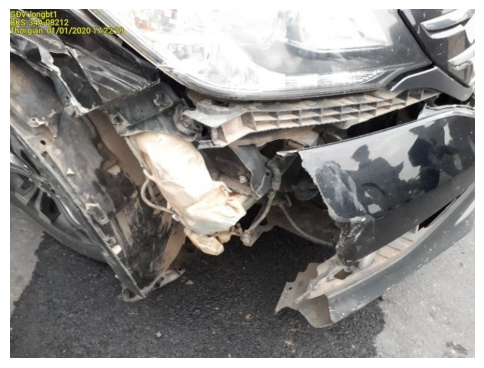

In [24]:
import cv2
import matplotlib.pyplot as plt

img_path = r"E:\Auto damage  vision\week3\runs\detect\predict\01012020_172204image891741.jpg"

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis("off")
plt.show()




## Step 6: Understanding the Predictions

Focus on:
- Where YOLO succeeds
- Where YOLO fails
- Confidence scores
- Missed detections


## Reflection

- Why does YOLO need anchor boxes?
- Why does multi-scale prediction help?
- Why might YOLO fail on small or subtle damage?


## Key Takeaway

YOLOv3 works because CNN feature maps preserve **spatial structure**.
Bounding boxes are predicted directly from these spatial representations.
